In [1]:
#### #Data management and manipulation ####
import pandas as pd # import pandas
import numpy as np # import numpy
from pandas_profiling import ProfileReport # data initial exploration tool
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
path='/Users/carlyfennell/DataScience/data_bootcamp/data/'

In [5]:
column_types={'mkt_carrier_fl_num': 'uint16', 'op_unique_carrier': 'category', 'tail_num': 'category', 'op_carrier_fl_num': 'uint16', 'origin_airport_id': 'uint16', 'origin': 'category', 'dest_airport_id': 'uint16', 'dest': 'category', 'crs_dep_time': 'uint16', 'dep_time': 'float32'}

In [6]:
df_flights= pd.read_csv(path+'df_flights.csv',dtype=column_types,parse_dates=['fl_date'],infer_datetime_format=True)

/opt/anaconda3/envs/bootcamp_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df_flights.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df_flights.shape

(15927485, 40)

##### Task 9: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [11]:
df_flights['origin'].unique()

array(['MCI', 'MCO', 'MDW', 'MEM', 'MHT', 'MKE', 'MSP', 'MSY', 'OAK',
       'OKC', 'OMA', 'ONT', 'ORF', 'PBI', 'PDX', 'PHL', 'PHX', 'PIT',
       'PNS', 'PVD', 'PWM', 'RDU', 'RIC', 'RNO', 'ROC', 'RSW', 'SAN',
       'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA',
       'STL', 'TPA', 'TUL', 'TUS', 'ATW', 'ATL', 'DHN', 'BOS', 'FAY',
       'DTW', 'FWA', 'AZO', 'BIS', 'GNV', 'ORD', 'BIL', 'BNA', 'AVP',
       'LAS', 'LGA', 'RST', 'PSP', 'SBN', 'MOT', 'RDM', 'MSN', 'ISN',
       'JFK', 'GEG', 'AEX', 'FCA', 'LAX', 'FAT', 'LAN', 'MSO', 'SUN',
       'GTR', 'FSD', 'GFK', 'BUR', 'IAH', 'PSC', 'SAV', 'DLH', 'GRB',
       'RAP', 'CID', 'SYR', 'GSO', 'MGM', 'LEX', 'HSV', 'HLN', 'MDT',
       'CLE', 'FAR', 'IAD', 'LGB', 'BHM', 'EWR', 'BOI', 'CRW', 'LNK',
       'DAY', 'MBS', 'DEN', 'IDA', 'DFW', 'GSP', 'ICT', 'MLU', 'MOB',
       'CVG', 'GRR', 'ABY', 'DSM', 'ELP', 'PIA', 'ERI', 'ASE', 'ROA',
       'AVL', 'CHA', 'CMH', 'LIT', 'TRI', 'HPN', 'IND', 'BQK', 'VLD',
       'BTR', 'BZN',

In [12]:
df_flights['dest'].unique()

array(['PHX', 'SAN', 'SAT', 'STL', 'TPA', 'ALB', 'ATL', 'AUS', 'BDL',
       'BHM', 'BNA', 'BUF', 'BWI', 'CMH', 'DAL', 'DCA', 'DEN', 'FLL',
       'GRR', 'HOU', 'IND', 'ISP', 'MCI', 'MDW', 'MEM', 'MHT', 'MKE',
       'MSY', 'ORF', 'PHL', 'PIT', 'PVD', 'RDU', 'ROC', 'SDF', 'SJU',
       'ABQ', 'BOS', 'CHS', 'CLE', 'CLT', 'CVG', 'DTW', 'EWR', 'JAX',
       'LAS', 'LGA', 'MCO', 'MSP', 'OKC', 'OMA', 'RSW', 'SLC', 'TUS',
       'OAK', 'BOI', 'BUR', 'GEG', 'LAX', 'LGB', 'ONT', 'PDX', 'SEA',
       'SNA', 'SJC', 'SMF', 'ELP', 'ICT', 'LIT', 'RNO', 'SFO', 'TUL',
       'DSM', 'ECP', 'ATW', 'DHN', 'FWA', 'AZO', 'FAY', 'AVP', 'BIS',
       'GNV', 'BIL', 'MBS', 'RST', 'PSP', 'RIC', 'SBN', 'CID', 'MOT',
       'RDM', 'JFK', 'MSN', 'ISN', 'ORD', 'AEX', 'FCA', 'FAT', 'LAN',
       'CHA', 'MSO', 'GTR', 'FSD', 'PSC', 'SUN', 'GFK', 'IAH', 'GRB',
       'SYR', 'MGM', 'LEX', 'GTF', 'RAP', 'HLN', 'FAR', 'GSO', 'IAD',
       'LNK', 'DAY', 'DLH', 'GSP', 'MLU', 'MOB', 'IDA', 'ABY', 'PIA',
       'ERI', 'ROA',

### Make sample of dataframe so code runs quicker in building phase (can delete this line later)

In [10]:
origin_sum=df_flights[['origin','dest']].groupby('origin').count().sort_values(by='dest',ascending=False)

In [11]:
dest_sum=df_flights[['origin','dest']].groupby('dest').count().sort_values(by='origin',ascending=False)

In [17]:
### To be used to pair airport code to airport ID
#initialize airport_id_dict from unique airport name as keys and airport_id as values
airport_id_dict=dict.fromkeys(df_flights['origin'].unique(), 0)
## get state for each airport code
#df_flights_sample['origin'].unique()
for i in range(len(df_flights[['origin','origin_airport_id']])):
    airport_id_dict[df_flights['origin'][i]]=df_flights['origin_airport_id'][i]

KeyboardInterrupt: 

In [24]:
### this only worked when I was putting together two equally unique lists (ie city name with airport code)
## making dictionary from two lists
# # initializing lists 
# test_keys = ["Rash", "Kil", "Varsha"] 
# test_values = [1, 4, 5] 
  
# # Printing original keys-value lists 
# print ("Original key list is : " + str(test_keys)) 
# print ("Original value list is : " + str(test_values)) 
  
# # using zip() 
# # to convert lists to dictionary 
# res = dict(zip(test_keys, test_values)) 

# t_keys=df_flights_sample['origin'].unique()
# t_values=df_flights_sample['origin_state'].unique()
# airport_code_dict=dict(zip(t_keys,t_values))


In [18]:
busy_airports=pd.concat([origin_sum,dest_sum],axis=1,join='inner',ignore_index=True)

In [19]:
#Adding total flights column for each airport
busy_airports['total_flights']=busy_airports[0]+busy_airports[1]

In [21]:
#Sorting and displaying top 10 busiest airports
busy_airports.sort_values(by='total_flights',ascending=False).head(10)

,0,1,total_flights
ORD,790253,790129,1580382
ATL,785850,785885,1571735
DFW,584688,584602,1169290
DEN,552134,552181,1104315
CLT,501557,501492,1003049
LAX,500840,500925,1001765
SEA,379367,379340,758707
SFO,357626,357770,715396
PHX,355485,355462,710947
IAH,354379,354337,708716


### top 10 busiest airports

In [22]:
#Sorting and displaying top 10 busiest airports - renaming columns so dataframe is more readable
busy_airports=busy_airports.reset_index().rename(columns={'index':'Airport_Code',0:'total_arr',1:'total_dest'})

In [25]:
#Sorting and displaying top 10 busiest airports - renaming columns so dataframe is more readable
busy_airports=busy_airports.reset_index().rename(columns={'Airport_Code':'origin',0:'total_arr',1:'total_dest'})

In [28]:
busy_airports=busy_airports.drop('index',axis=1)

In [29]:
busy_airports.columns

Index(['origin', 'total_arr', 'total_dest', 'total_flights'], dtype='object')

In [30]:
busy_airports.head(11)

,origin,total_arr,total_dest,total_flights
0,ORD,790253,790129,1580382
1,ATL,785850,785885,1571735
2,DFW,584688,584602,1169290
3,DEN,552134,552181,1104315
4,CLT,501557,501492,1003049
5,LAX,500840,500925,1001765
6,SEA,379367,379340,758707
7,SFO,357626,357770,715396
8,PHX,355485,355462,710947
9,IAH,354379,354337,708716


In [31]:
busy_airports[['origin', 'total_flights']].to_csv(path+'busy_feature.csv')

In [32]:
#storing cumulative air traffic so I can visualize it later
cum_air_traffic = np.cumsum(busy_airports['total'])

In [33]:
busy_airports['cumulative_airtraffic_total']=cum_air_traffic

In [35]:
#calculating the percentage of flights (of total in database) through each airport 
busy_airports['perc_flights']=busy_airports['total']/sum(busy_airports['total'])

In [36]:
cum_air_perc = np.cumsum(busy_airports['perc_flights'])

In [37]:
busy_airports['cumulative_perc_flights']=cum_air_perc

In [38]:
busy_airports['cumulative_perc_flights'].head(10).iloc[-1]

0.31840492535796006

In [39]:
busy_airports.head(10)

,Airport_Code,total_arr,total_dest,total,cumulative_airtraffic_total,perc_flights,cumulative_perc_flights
0,ATL,16805,16349,33154,33154,0.055257,0.055257
1,ORD,13654,12055,25709,58863,0.042849,0.098105
2,DFW,11766,10784,22550,81413,0.037584,0.135689
3,DEN,11255,10988,22243,103656,0.037072,0.172761
4,CLT,9676,7957,17633,121289,0.029388,0.202149
5,LAX,7537,6115,13652,134941,0.022753,0.224903
6,IAH,7233,7383,14616,149557,0.024360,0.249263
7,PHX,6918,6408,13326,162883,0.022210,0.271473
8,DTW,6747,7498,14245,177128,0.023742,0.295215
9,MSP,6728,7186,13914,191042,0.023190,0.318405


In [1]:
busy_airports[['Airport_Code','total_arr','total_dest','total']].head(10)

NameError: name 'busy_airports' is not defined

In [40]:
print('Top 10 busiest airports are: ', list(busy_airports['Airport_Code'].head(10)), 'in descending order of air traffic')

Top 10 busiest airports are:  ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'DTW', 'MSP'] in descending order of air traffic


In [41]:
print('They make up: ', round(busy_airports['cumulative_perc_flights'].head(10).iloc[-1],2)*100, 'percent of all air traffic in the US')

They make up:  32.0 percent of all air traffic in the US


In [42]:
print('This amounts to',busy_airports['cumulative_airtraffic_total'].head(10).iloc[-1], 'flights')

This amounts to 191042 flights


### Part 2 - link to passengers table and see if # passengers coincides with # flights

In [43]:
path='/Users/carlyfennell/DataScience/data_bootcamp/data/'
df_pass=pd.read_csv(path+'P_clean.csv')

In [44]:
df_pass.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [45]:
# identify columns that overlap between two tables
set1=set(df_pass.columns)
set2=set(df_flights_sample.columns)
set1&set2

In [48]:
df_p_slice=df_pass[['dest','origin','passengers','payload','seats','dest_airport_id','origin_airport_id']]

In [49]:
len(list(df_pass['dest_airport_id'].unique()))

2564

In [51]:
df_flights_sample.columns

Index(['mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_airport_id',
       'dest_airport_id', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out',
       'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time',
       'arr_delay', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'distance', 'tail_num', 'origin', 'dest', 'bin_mkt_unique_carrier',
       'bin_branded_code_share', 'bin_mkt_carrier', 'bin_op_unique_carrier',
       'year', 'month', 'date', 'origin_city', 'origin_state', 'dest_city',
       'dest_state'],
      dtype='object')

In [52]:
#Slicing dataframe where I need it (to help computation in future)
df_flight_slice=df_flights_sample[['origin_airport_id',
       'dest_airport_id','origin', 'dest']]

In [56]:
len(df_flights_sample['origin_airport_id'].unique())

374

In [57]:
len(df_flights_sample['dest_airport_id'].unique())

373

In [58]:
setA=set(df_flights_sample['origin_airport_id'].unique())

In [59]:
setB=set(df_flights_sample['dest_airport_id'].unique())

In [60]:
#double checking to ensure the origin and dest airport id lists are the 
#exact same (so I can filter dataframes off this)
setA^setB

{10590}

In [62]:
#creating list of "codes to keep" to filter passenger table with
code_to_keep=df_flights_sample['origin_airport_id'].unique()

In [63]:
df_p_slice.shape

(2350494, 7)

In [64]:
### Filter dataframe via list 
#https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql
df_p_filt=df_p_slice[df_p_slice['origin_airport_id'].isin(code_to_keep)]

In [65]:
#this shows that we went from 2.35 million rows to 1.87 by filtering out dataframe 
# to only include airports in our flights table
df_p_filt.shape

(1870298, 7)

In [66]:
df_p_filt.head()

,dest,origin,passengers,payload,seats,dest_airport_id,origin_airport_id
0,HPB,BET,2,1200,6,12195,10551
1,HPB,BET,2,1800,9,12195,10551
2,HPB,BET,68,114800,369,12195,10551
3,KKH,BET,13,11200,56,12708,10551
4,KKH,BET,8,7200,36,12708,10551


In [67]:
# MERGY DONT LIKEY
# Doing merges crashed my kernel many times - Merging not computationally feasible on 
# huge datasets
#df_flight_slice.merge(df_p_filt,on='origin_airport_id',how='inner')

In [110]:
## grouping filtered passenger table by origin and summing # passengers through each airport
pass_origin=df_p_filt[['origin_airport_id','passengers']].groupby('origin_airport_id').sum().sort_values('passengers',ascending=False)                                                                                                                                                                                                                                                                                                         

SyntaxError: invalid syntax (<ipython-input-110-baa9779fdb1e>, line 1)

In [69]:
## filtering Passengers table based on dest airport id codes
df_p_filt2=df_p_slice[df_p_slice['dest_airport_id'].isin(code_to_keep)]

In [70]:
## grouping filtered passenger table by destination and summing # passengers through each airport
pass_dest=df_p_filt2[['dest_airport_id','passengers']].groupby('dest_airport_id').sum().sort_values('passengers',ascending=False)

In [71]:
busy_passengers=pd.concat([pass_origin,pass_dest],axis=1,join='inner',ignore_index=True)

In [72]:
busy_passengers=busy_passengers.rename(columns={0:'org_passengers',1:'dest_passengers'})

In [73]:
busy_passengers['total_passengers']=busy_passengers['org_passengers']+busy_passengers['dest_passengers']

In [74]:
busy_passengers.sort_values(by='total_passengers',ascending=False).head(10)

,org_passengers,dest_passengers,total_passengers
10397,257478059,257786488,515264547
12892,205745255,205188513,410933768
13930,194019087,194589089,388608176
11298,163888490,164225714,328114204
11292,151024252,151120966,302145218
12478,148927079,150154185,299081264
14771,133266076,134024630,267290706
12889,117526251,117605384,235131635
14747,113960665,114272139,228232804
11057,112838675,113164033,226002708


In [76]:
# Add Airport_id to dataframe with flight totals

air_id=[]
for i in range(len(busy_airports)):
    air_id.append(airport_id_dict[busy_airports['Airport_Code'][i]])


In [77]:
busy_airports['airport_id']=air_id

In [78]:
busy_airports=busy_airports.rename(columns={'total':'total_flights'})

In [79]:
busy_airports.head()

,Airport_Code,total_arr,total_dest,total_flights,cumulative_airtraffic_total,perc_flights,cumulative_perc_flights,airport_id
0,ATL,16805,16349,33154,33154,0.055257,0.055257,10397
1,ORD,13654,12055,25709,58863,0.042849,0.098105,13930
2,DFW,11766,10784,22550,81413,0.037584,0.135689,11298
3,DEN,11255,10988,22243,103656,0.037072,0.172761,11292
4,CLT,9676,7957,17633,121289,0.029388,0.202149,11057


In [80]:
busy_passengers=busy_passengers.reset_index().rename(columns={'index':'airport_id'})

In [81]:
#creating dataframe that will finally have # passengers with # flights for each airport id
flight_pass=busy_airports.merge(busy_passengers,on='airport_id',how='inner')

In [82]:
flight_pass.columns

Index(['Airport_Code', 'total_arr', 'total_dest', 'total_flights',
       'cumulative_airtraffic_total', 'perc_flights',
       'cumulative_perc_flights', 'airport_id', 'org_passengers',
       'dest_passengers', 'total_passengers'],
      dtype='object')

In [83]:
flight_pass[['Airport_Code','total_flights','total_passengers']].corr()

,total_flights,total_passengers
total_flights,1.000000,0.947819
total_passengers,0.947819,1.000000


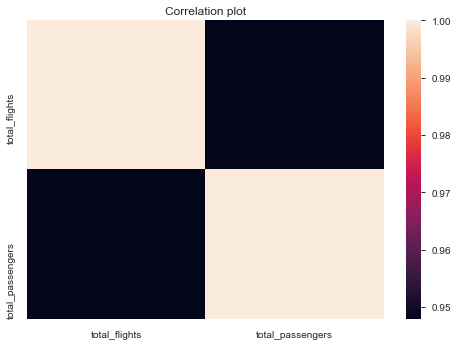

In [84]:
# compute correlations between features
df_corr = flight_pass[['Airport_Code','total_flights','total_passengers']].corr()

# plot the correlations
sns.heatmap(df_corr)
plt.title('Correlation plot')
plt.show()

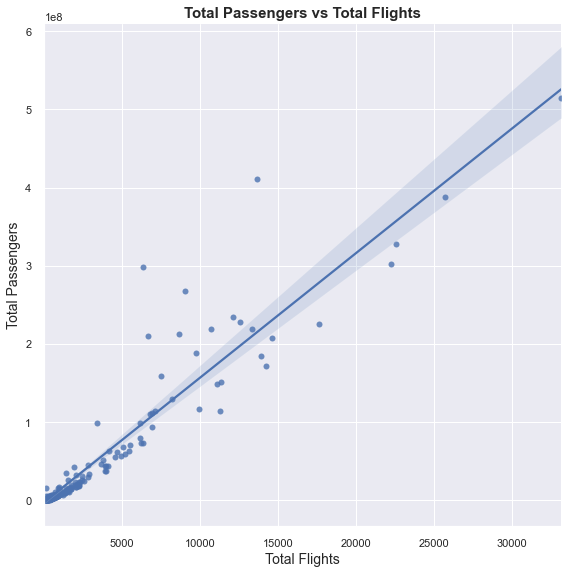

In [107]:
#sns.set_style('whitegrid') 
fig=sns.lmplot(x ='total_flights', y ='total_passengers', data = flight_pass,height=8)
plt.title('Total Passengers vs Total Flights',weight='bold', size=15)
plt.xlabel('Total Flights', size=14)
plt.ylabel('Total Passengers', size=14)
plt.show()
fig.savefig('/Users/carlyfennell/DataScience/data_bootcamp/w5/midterm_project/lhl_midterm/visualization/Task_9_passvsflight.png')

In [86]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [91]:
r2(flight_pass['total_flights'],flight_pass['total_passengers'])

0.8983612531589825

/opt/anaconda3/envs/bootcamp_env/lib/python3.7/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


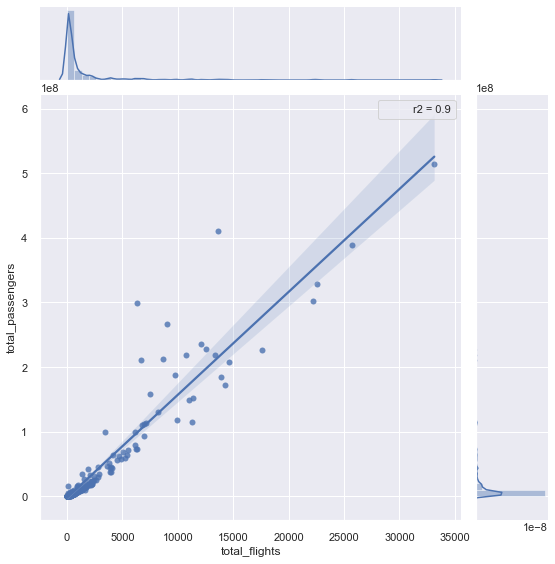

In [108]:
fig=sns.jointplot(x ='total_flights', y ='total_passengers', 
              data = flight_pass, kind="reg",stat_func=r2,height=8)

In [109]:
fig.savefig('/Users/carlyfennell/DataScience/data_bootcamp/w5/midterm_project/lhl_midterm/visualization/Task_9_passvsflightB.png')

# Task 6

In [ ]:
busy_state=[]
for i in range(len(busy_airports)):
    busy_state.append(airport_code_dict[busy_airports['Airport_Code'][i]])


In [ ]:
busy_airports['busy_state']=busy_state

In [ ]:
busy_airports

In [ ]:
busy_states=busy_airports.groupby('busy_state').sum().sort_values(by='total',ascending=False)

In [ ]:
busy_states['Percent_traffic']=busy_states['total']/sum(busy_states['total'])

In [ ]:
busy_states.head(8).reset_index()

In [ ]:
import plotly.graph_objects as go

In [ ]:
#tot = sum(pca_bank.explained_variance_)
##var_exp=pca_bank.explained_variance_/np.sum(pca_bank.explained_variance_)
##cum_var_exp = np.cumsum(pca_bank.explained_variance_)/np.sum(pca_bank.explained_variance_)
##cum_var_exp = np.cumsum(pca_bank.explained_variance_)/np.sum(pca_bank.explained_variance_)
##cum_var_exp = np.cumsum(var_exp)

var_exp=busy_states['Percent_traffic']
cum_var_exp = np.cumsum(var_exp)


trace1 = dict(
    type='bar',
    x=['%s' %i for i in busy_states.head(8).reset_index()['busy_state']],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['%s' %i for i in busy_states.head(8).reset_index()['busy_state']], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Cumulative Sum for airtraffic in Busiest States',
    yaxis=dict(
        title='Percentage Air Traffic'
    ),
    width=900, 
    height=500,
    annotations=list([
        dict(
            x=1.205,
            y=1.05,
            xref='paper',
            yref='paper',
            text='US Air Traffic per State',
            showarrow=False,
        )
    ])
)


fig = go.Figure(data=data,layout=layout)
fig.show()

In [ ]:
busy_states['Cumulative_sum']=cum_var_exp

In [ ]:
busy_states[busy_states['Cumulative_sum']<.55]

In [ ]:
len(busy_states[busy_states['Cumulative_sum']<.55])/len(busy_states)

In [ ]:
print(len(busy_states[busy_states['Cumulative_sum']<.55]),'out of ',len(busy_states), 'states make up 50% of air traffic in the US')

In [ ]:
print('They are, in descending order of air traffic: ',list(busy_states[busy_states['Cumulative_sum']<.55].index))